2015-10-09
    modified for py3

In [2]:
%matplotlib inline
from matplotlib.pyplot import *

In [3]:
from hambiplots.smithplot import *

In [9]:
import hambiplots.smithplot as sp

from hambiplots.smithplot.utils import parseCSV

In [10]:
import sys
from multiprocessing import pool
sys.path.append("..")
sys.path.append("./example")

import matplotlib.pyplot as pp
import numpy as np
import os
import shutil
import smithplot
import time

from smithplot.smithaxes import update_scParams
from matplotlib.transforms import Affine2D
from multiprocessing.pool import Pool
from types import FunctionType



# default params
update_scParams({"init.updaterc": True,
                "plot.hacklines": False,
                "plot.rotatemarker": False,
                "grid.major.fancy": False,
                "grid.minor.fancy": False,
                "grid.minor.xauto": 3,
                "grid.minor.yauto": 3,
                "axes.norm": None,
                "axes.ylabel.correction": (-2, 0)})

In [11]:
build_all = True
build_path = "./build/"

In [13]:
# sample data
data = parseCSV("smithexample/data/s11", startRow=1, steps=10)
s11 = data[:, 1] + data[:, 2] * 1j

data = parseCSV("smithexample/data/s22", startRow=1, steps=10)
s22 = data[:, 1] + data[:, 2] * 1j

line = np.array([0.4 + 0.7j, 0.4 + 1.8j, 2 + 1j, 2])

c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


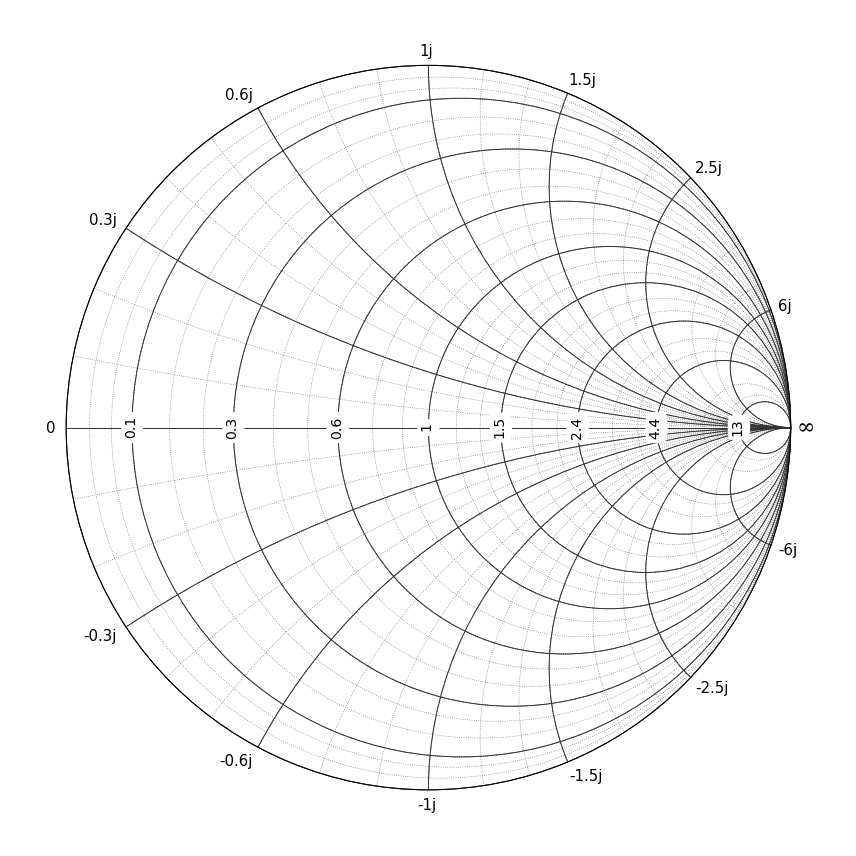

In [14]:
resize = 0.75
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")

savefig("ex_grid.svg", format = "svg")

c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


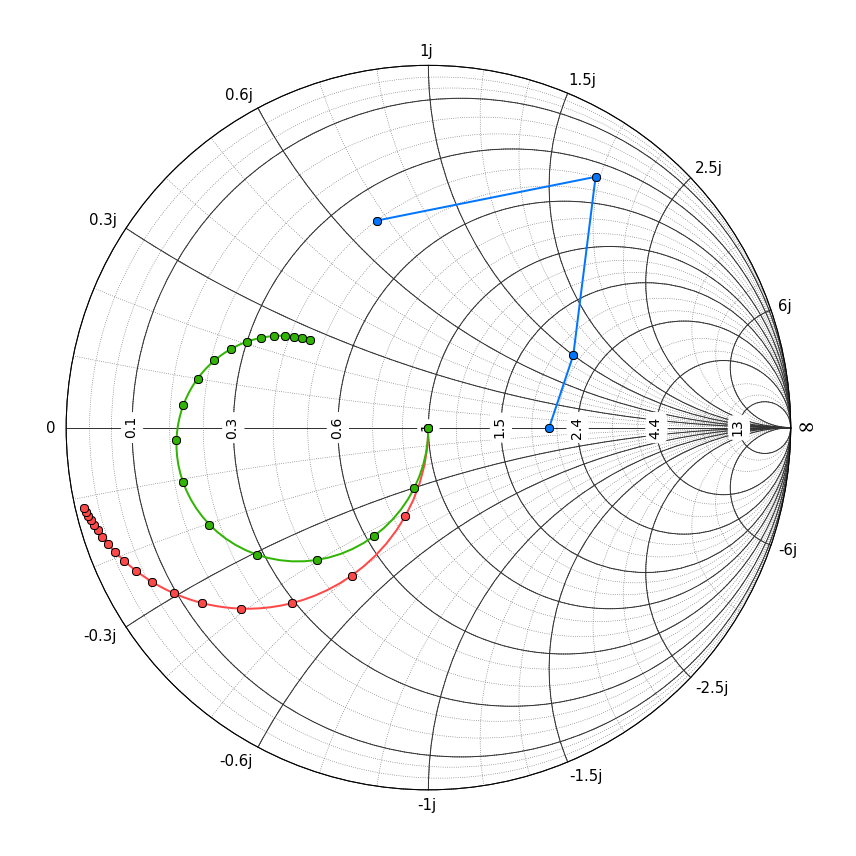

In [15]:
resize = 0.75
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(s11,  s22, markevery=5)
plot(line)
#plot_example()
savefig("ex_grid.pdf", format="pdf")

#Bachelor

In [16]:
initial = np.array([(14+1j*6.5)/50.])

expected_perfect = np.array([(14+1j*6.5)/50.,
                     0.31+1j*1.13,
                     1.37+1j*2.08, 
                     1.0+1j*0])

expected = np.array([0.29+1j*0.18,
                     0.31+1j*0.34,
                     0.31+1j*1.13,
                     1.37+1j*2.08, 
                     1.06+1j*0.05])

measured = np.array([0.29+1j*0.18, 
                     0.31+1j*0.34,
                     0.37+1j*1.23,
                     1.06+1j*1.72,
                     #0.75+1j*0.08,
                     0.99+1j*0.15])

In [17]:
abs((initial-1)/(initial+1))

array([ 0.56866993])

c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


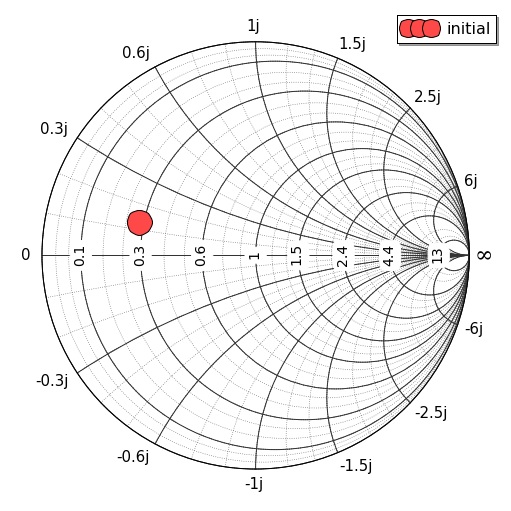

In [18]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(initial, 'o', markersize = 25,label='initial') #o', markersize=20,
#plot(measured, markersize=20)
legend()
savefig("ex_init.pdf", format="pdf")

c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


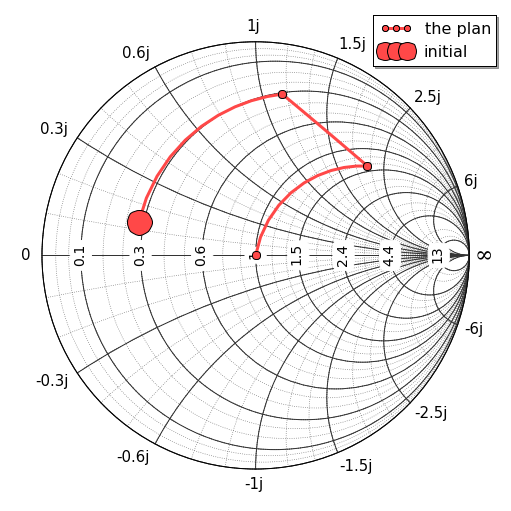

In [19]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
base_line, = plot(expected_perfect,path_interpolation=10, lw=3, label='the plan')
plot(initial, 'o', color = base_line.get_color(), markersize = 25, label='initial') #o', markersize=20,

#plot(measured, markersize=20)
legend()
savefig("ex_exp_perf.pdf", format="pdf")

c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


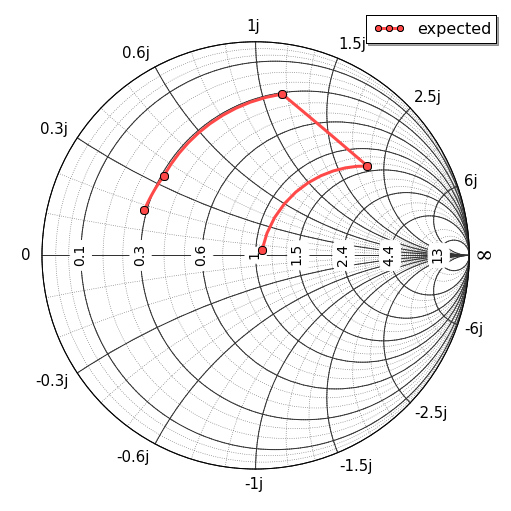

In [20]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(expected, path_interpolation=10, lw=3, label='expected') #o', markersize=20,
#plot(measured, markersize=20)
legend()
savefig("ex_exp.pdf", format="pdf")

In [21]:
measured

array([ 0.29+0.18j,  0.31+0.34j,  0.37+1.23j,  1.06+1.72j,  0.99+0.15j])

In [22]:
measured[0:]

array([ 0.29+0.18j,  0.31+0.34j,  0.37+1.23j,  1.06+1.72j,  0.99+0.15j])

0
1
2
3
4


c:\users\anna\anaconda3\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


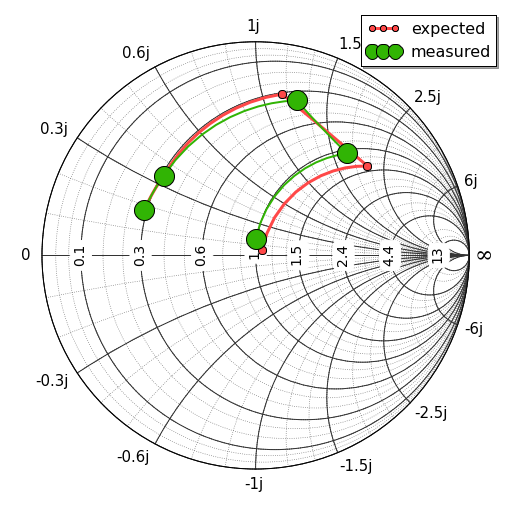

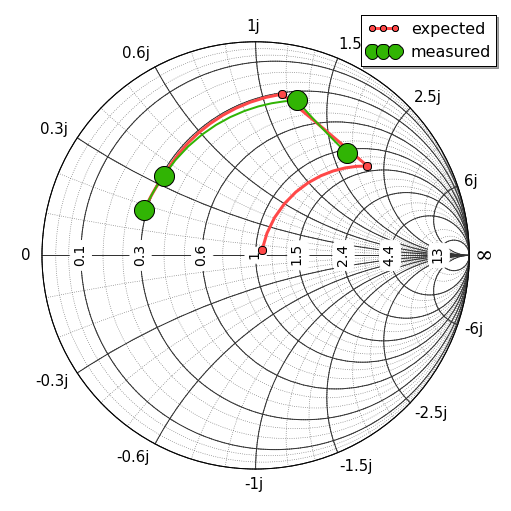

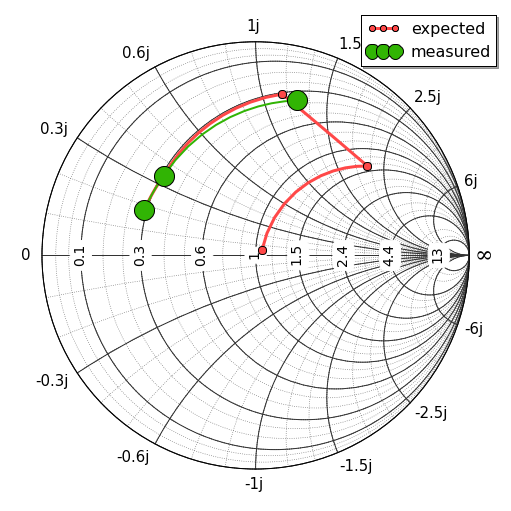

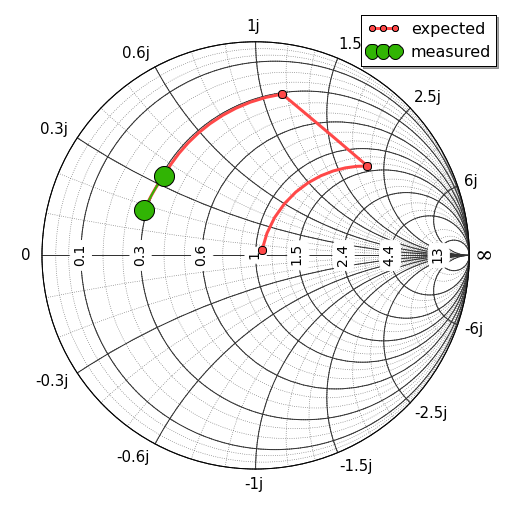

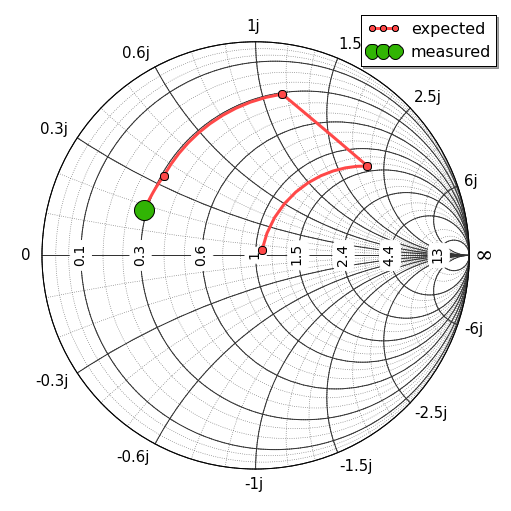

In [23]:
resize = 0.45
from numpy import arange

for i in arange(0, len(measured)):
    print(i)
    fig = figure(figsize=(resize*24, resize*16))
    fig.set_tight_layout(True)
    subplot(111, projection="smith")
    plot(expected, path_interpolation=10, lw=3, label='expected') #o', markersize=20,
    if i == 0:
        plot(measured[0:], path_interpolation=10, markersize=20, label='measured')
    else:
        plot(measured[0:-i], path_interpolation=10, markersize=20, label='measured')
    legend()
    savefig("ex_meas_exp_"+str(i)+".png", format="png")